In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data =  pd.read_csv(r"C:\Users\vadey\Downloads\data.csv")
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [5]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [64]:
data.shape

(4600, 20)

**With 17 predictor variables and 1 outcome variable, we have data 4600 houses to analyze and possibly build good predictive models for house prices.

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Summary statistics with the describe() method helps us get an overview of numeric data:


In [8]:
data.isnull().sum() #No missing values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [7]:
data.skew()

price            24.790933
bedrooms          0.456447
bathrooms         0.616033
sqft_living       1.723513
sqft_lot         11.307139
floors            0.551441
waterfront       11.682901
view              3.341586
condition         0.959068
sqft_above        1.494211
sqft_basement     1.642732
yr_built         -0.502155
yr_renovated      0.385919
dtype: float64

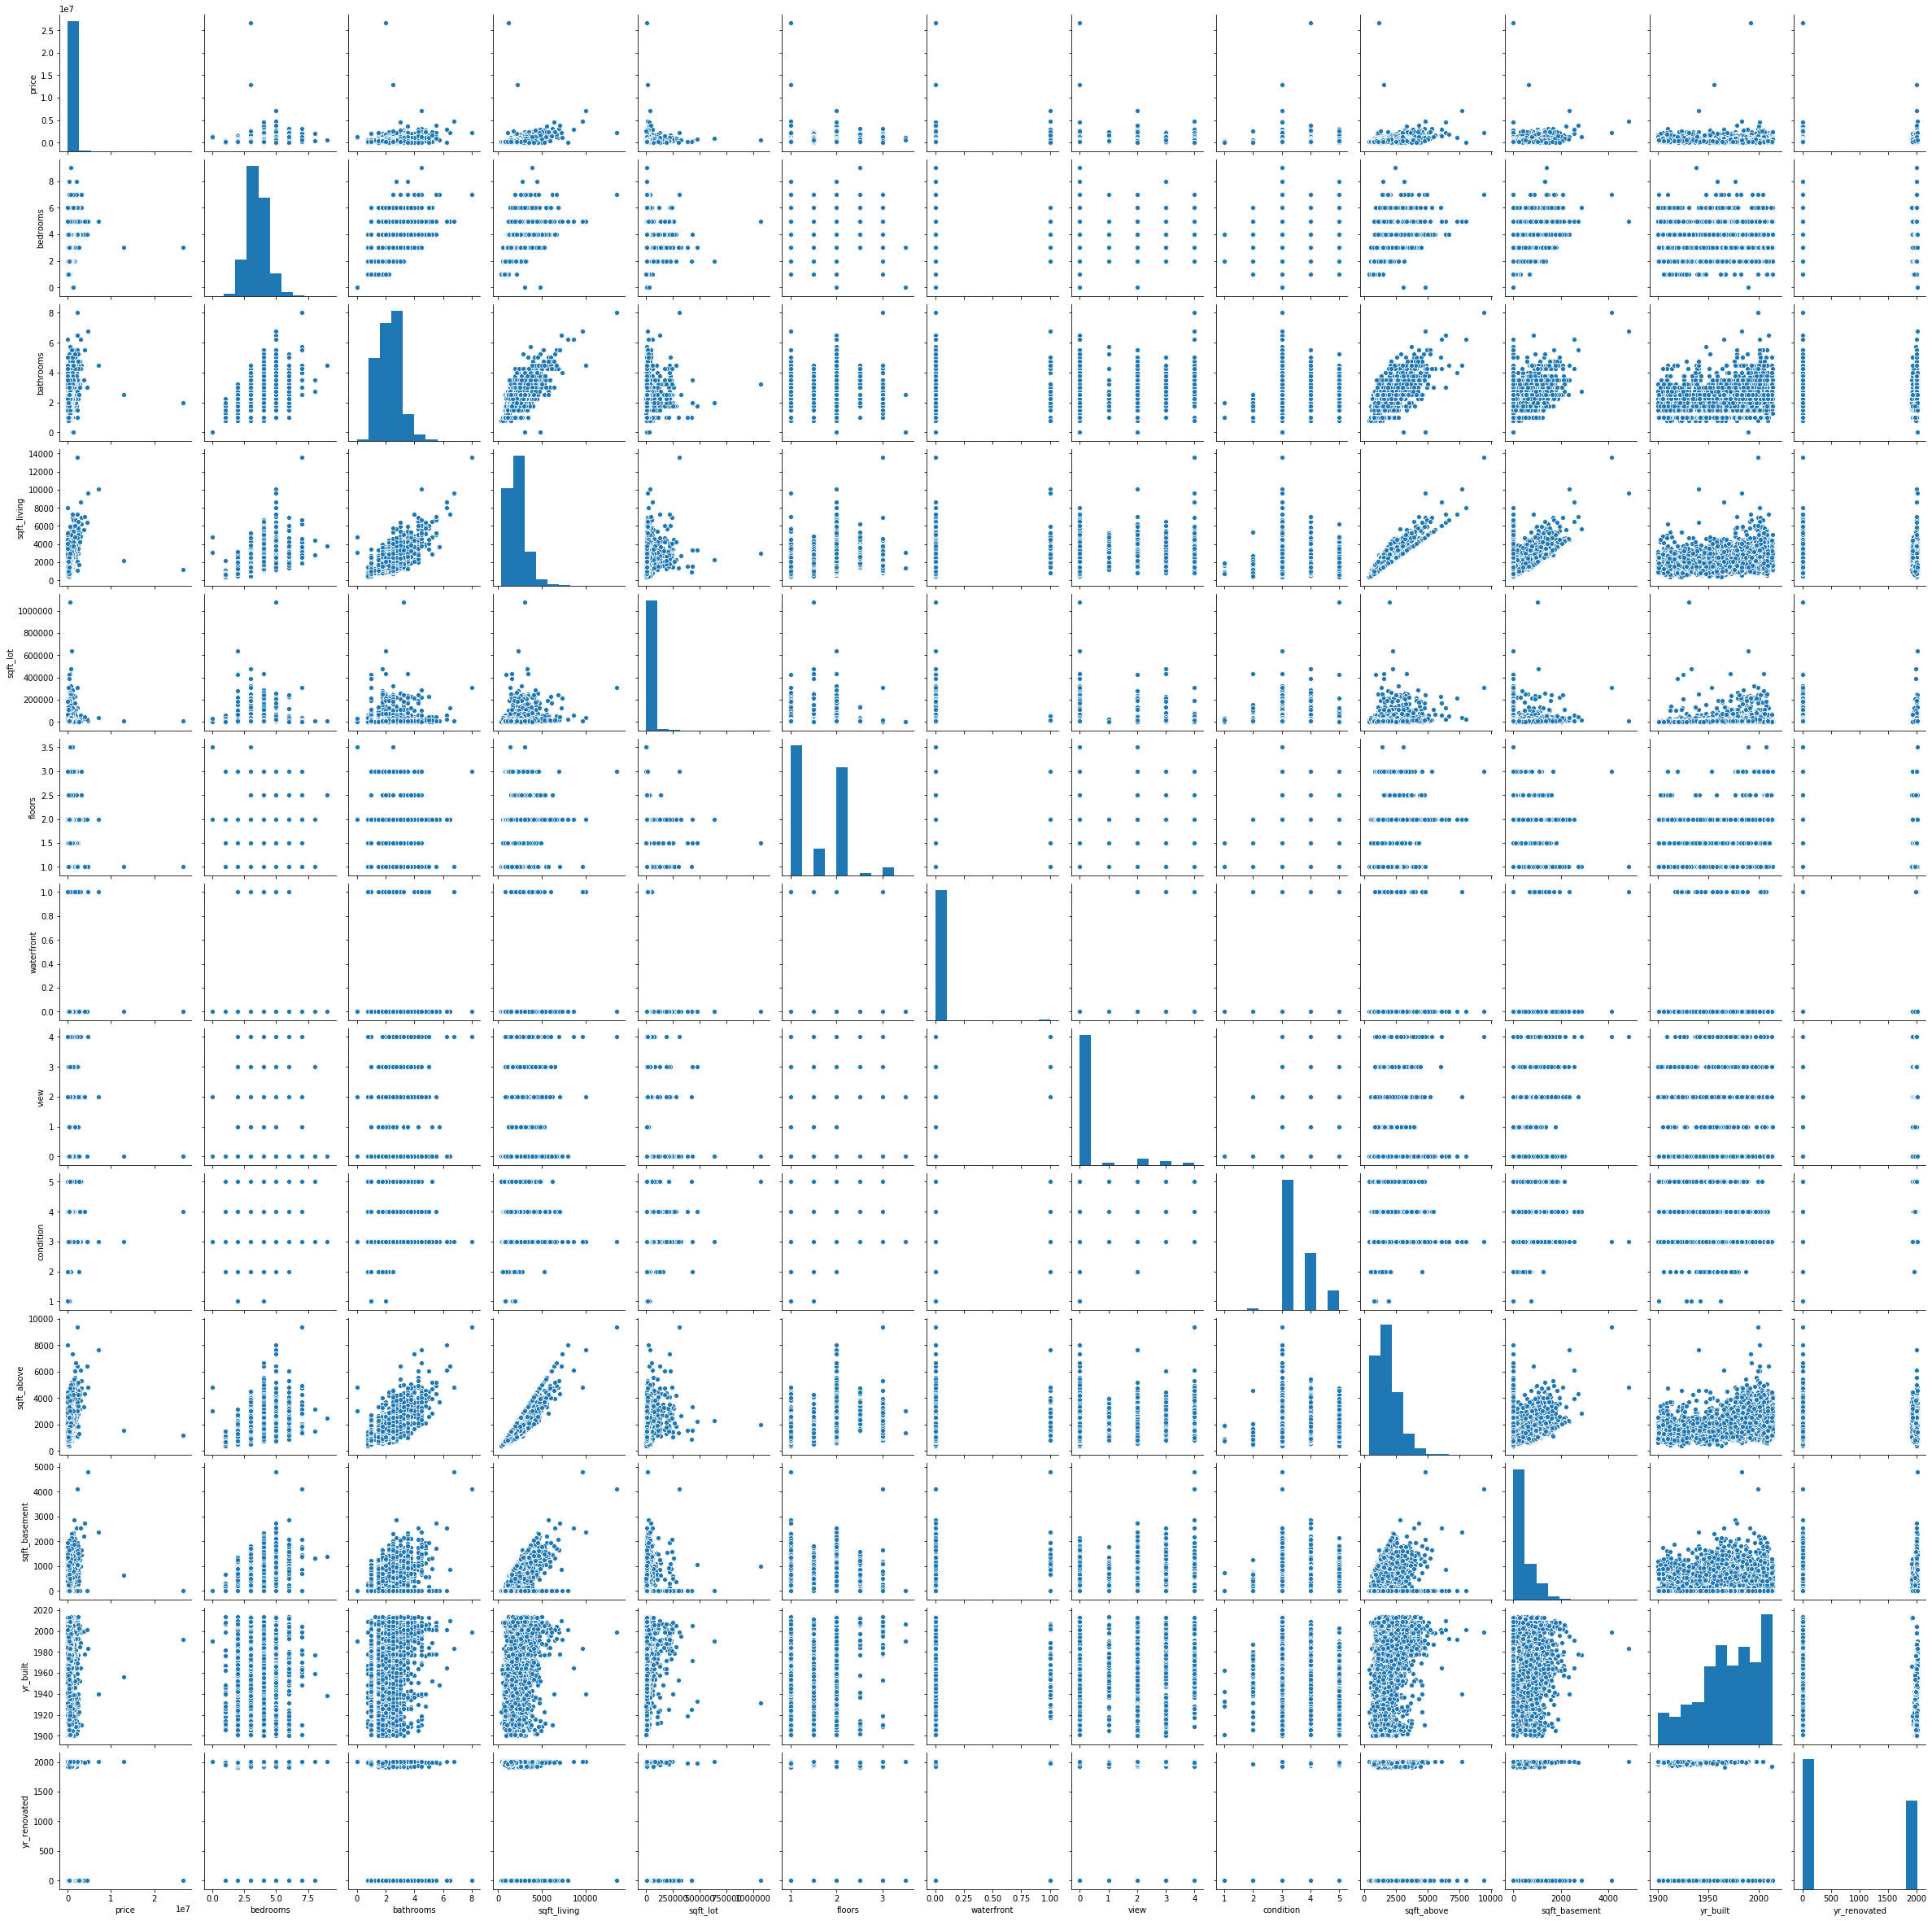

In [11]:
sns.pairplot(data, kind='scatter')

In [45]:
data.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,yr_sale,month
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,NaN,0.041081
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,NaN,0.010835
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,NaN,0.026697
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,NaN,0.032825
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,NaN,-0.023286
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,NaN,0.036890
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,NaN,0.007530
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,NaN,-0.011304
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,NaN,0.017695
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,NaN,0.042919


In [40]:
data['date'] = pd.to_datetime(data.date)

In [42]:
#Parsing the year from the date time format
data['yr_sale'] = pd.DatetimeIndex(data['date']).year


In [43]:
#Parsing the month from the date time format
data['month'] = pd.DatetimeIndex(data['date']).month


In [44]:
data['month'].unique()

array([5, 6, 7], dtype=int64)

<Figure size 1296x720 with 0 Axes>

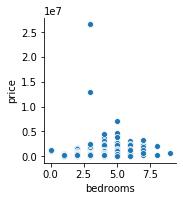

In [50]:
plt.figure(figsize=(18,10))
sns.pairplot(data,y_vars='price', x_vars='bedrooms')

In [29]:
#Parsing the month from the date time format
data['week'] = pd.DatetimeIndex(data['date']).week


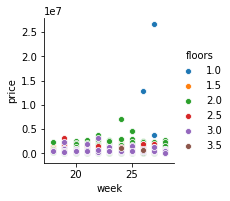

In [33]:
sns.pairplot(data,y_vars='price', x_vars='week', hue='floors')

In [ ]:
###Plots of Price against the more relevant variables###

In [67]:
bedroom_grp = data.groupby('bedrooms')
bedroom_grp['price'].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0.0,2.0,1.195324e+06,1.418796e+05,1095000.0,1145162.0,1195324.0,1245486.00,1295648.0
1.0,38.0,2.740763e+05,1.235069e+05,0.0,191000.0,262500.0,346250.00,540000.0
2.0,566.0,3.916219e+05,1.951196e+05,0.0,255000.0,369500.0,482958.75,1695000.0
3.0,2032.0,4.886130e+05,6.905088e+05,0.0,300000.0,424750.0,565250.00,26590000.0
4.0,1531.0,6.351194e+05,3.808935e+05,0.0,391700.0,568000.0,775000.00,4489000.0
5.0,353.0,7.701860e+05,6.646663e+05,0.0,405000.0,580000.0,925000.00,7062500.0
6.0,61.0,8.173628e+05,5.913229e+05,0.0,450000.0,665000.0,1125000.00,3100000.0
7.0,14.0,1.049429e+06,8.522154e+05,280000.0,542500.0,711500.0,1179750.00,3200000.0
8.0,2.0,1.155000e+06,1.152584e+06,340000.0,747500.0,1155000.0,1562500.00,1970000.0


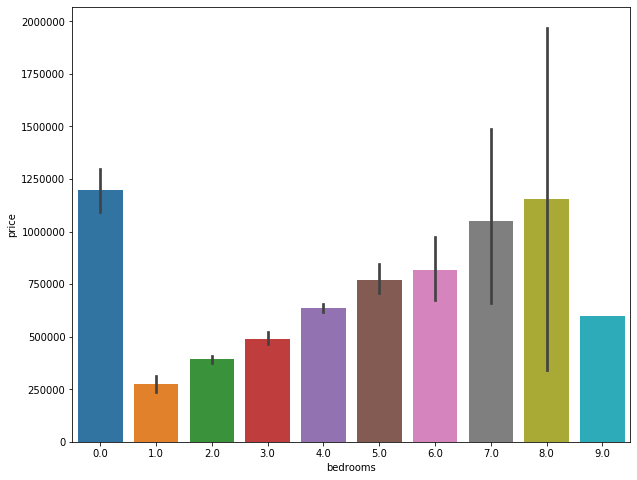

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['bedrooms'], y=data['price'])

Plotting Price against bedrooms show an expected trend of upwards price with increased number of bedrooms except at the extremes...
**Houses with 0 bedrooms*
**1 House with 9 bedrooms selling lower than the mean cost of houses with 4 bedrooms

In [62]:
condition_grp = data.groupby('condition')
condition_grp['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,6.0,306633.333333,186665.922618,7800.0,240000.00,310000.0,411500.0,550000.0
2,32.0,324373.750000,426231.617276,0.0,163750.00,250000.0,318750.0,2555000.0
3,2875.0,550111.516394,434311.756362,0.0,330000.00,465000.0,654475.0,12899000.0
4,1252.0,533647.286072,813713.872872,0.0,299983.75,440000.0,619565.0,26590000.0
5,435.0,637041.322258,429941.515589,0.0,377475.00,550000.0,744975.0,3200000.0


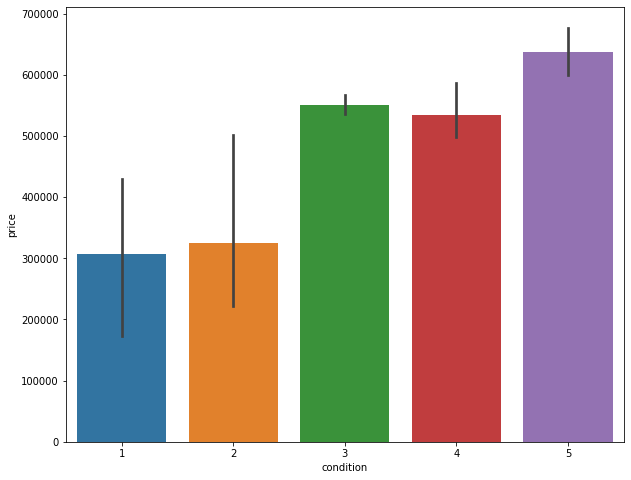

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['condition'], y=data['price'])

**Plotting Condition of a house on a scale of 1-5 at time of purchase, it is easy to see the relationship that has with the eventual price the house was sold for**

In [66]:
bathrooms_grp = data.groupby('bathrooms')
bathrooms_grp['price'].describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.00,2.0,1.195324e+06,1.418796e+05,1095000.0,1145162.0,1195324.0,1245486.00,1295648.0
0.75,17.0,2.939559e+05,1.469898e+05,80000.0,190000.0,276000.0,360000.00,562100.0
1.00,743.0,3.326206e+05,1.631452e+05,0.0,225000.0,306000.0,408250.00,2110000.0
1.25,3.0,4.611500e+05,1.213900e+05,321950.0,419225.0,516500.0,530750.00,545000.0
1.50,291.0,4.110443e+05,2.345664e+05,0.0,261750.0,365000.0,466875.00,2199900.0
1.75,629.0,4.595496e+05,2.088703e+05,0.0,314500.0,433000.0,550000.00,2100000.0
2.00,427.0,5.268580e+05,1.282802e+06,0.0,294850.0,437000.0,586500.00,26590000.0
2.25,419.0,5.371784e+05,3.046389e+05,0.0,350000.0,475000.0,623000.00,2400000.0
2.50,1189.0,5.727052e+05,4.454744e+05,0.0,375000.0,525000.0,675000.00,12899000.0


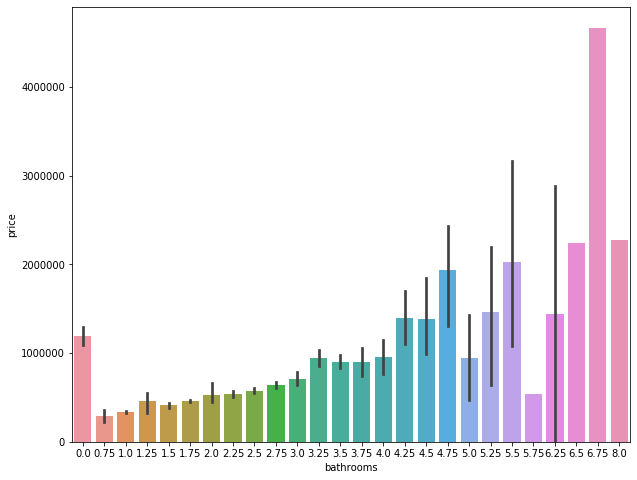

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['bathrooms'], y=data['price'])

**Plotting price against bathrooms, theres also a similar trend as with bedrooms...
Houses with 0 bathrooms are a problem here also

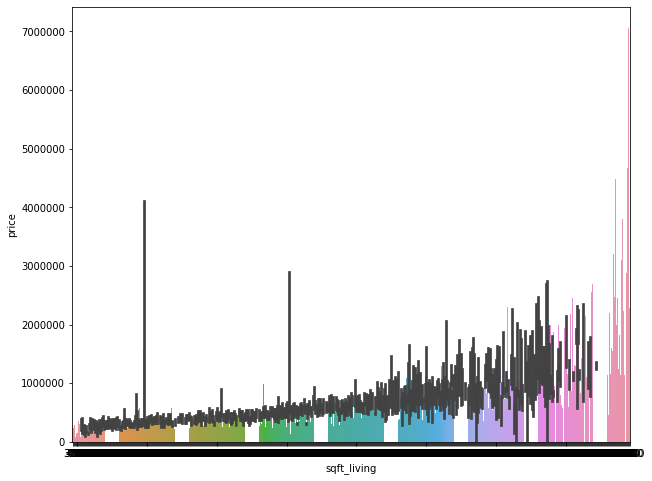

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['sqft_living'], y=data['price'])

**Possible suggestion here would be to group square feet into groups when plotting to get a better plot...But from this raw plot, we can observe a general trend of increased square foot of living leading to an increased house price.

In [76]:
data['price'].loc[data.price == 0].count() #Houses with No Prices

49

**Points of Note from Analysis**

**1. Some of the outliers might have to be removed especially the ones i highlighted earlier because it would affect the impact of bedroom, bathroom, and condition on the predicted price.

**2. There are 49 houses with No price at all, they would have to be removed or new prices imputed for them based on the mean or model imputation.